In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt




,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


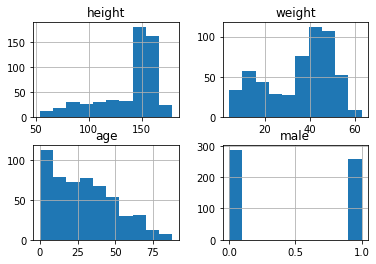

In [2]:
import pandas as pd
d = pd.read_csv('data/Howell1.csv', sep=';', header=0)
d.hist()

d.head()



All we want for now are heights of adults in the sample. The reason to filter out nonadults
for now is that height is strongly correlated with age, before adulthood

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'male'}>]], dtype=object)

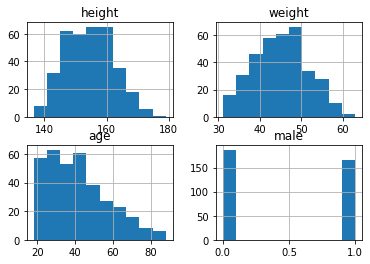

In [4]:
d2 = d[d.age >= 18]
d2.hist()

<p>Adult heights from a single population are nearly always approximately normal. ( bimodel if you take gender in account).So it’s reasonable for the moment to adopt the stance that the model should use a Gauss- ian distribution for the probability distribution of the data. </p>
<p>So which Gaussian distribution? There are an infinite number of them, with an infinite number of different means and standard deviations. We’re ready to write down the general model and compute the plausibility of each combination of μ and σ. To define the heights as normally distributed with a mean μ and standard deviation σ, we write:</p>

$$ h_i ∼ Normal(μ, σ)$$

What are the priors

$$μ ∼ Normal(165,40)$$

$$ σ ∼ Uniform(0, 50)$$

In [5]:
with pm.Model() as normalheightmodel:
    mu = pm.Normal('mu', mu=165, sd=40)#prior for mu
    sigma = pm.Uniform('sigma', lower=0, upper=50)#prior for sigma
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)#likelyhood
    prior_checks = pm.sample_prior_predictive(samples=50)

In [7]:
prior_checks

{'height': array([[ 90.00843814,  87.67967546,  89.74327131, ..., 131.5248268 ,
         123.94621813,  68.69140072],
        [141.15356978, 124.90812712, 143.22810348, ..., 123.35950674,
         107.12790736, 104.3163415 ],
        [173.23860521, 169.75646687, 166.15481293, ..., 181.1593426 ,
         167.52771557, 149.38843699],
        ...,
        [174.76613109, 159.58554077, 123.6424843 , ..., 134.62592619,
         174.96600932, 228.45771806],
        [184.83990795, 164.37206085, 185.58838703, ..., 178.00582606,
         178.62614365, 169.09604037],
        [247.56327727, 255.8627875 , 204.30705624, ..., 200.58345234,
         214.2203451 , 194.27835116]]),
 'sigma': array([45.8737161 , 22.36667498,  9.19357767, 16.11851642, 24.07024155,
        32.90873569,  6.50617036,  9.56279779, 36.62230488, 44.3760532 ,
        11.84346505, 29.31110659, 25.8927938 ,  3.78400035, 36.52849526,
        19.42364497, 12.40266339, 38.04880968,  6.62417203, 21.76960764,
         3.85872137, 21.56

In [8]:
priorDF=pd.DataFrame()
for key, value in prior_checks.items():
   if (key !='height'):
        priorDF[key]=value
priorDF.head()   

,sigma,sigma_interval__,mu
0,45.873716,2.408515,102.253863
1,22.366675,-0.211450,133.622039
2,9.193578,-1.490334,168.468484
3,16.118516,-0.742900,132.174156
4,24.070242,-0.074415,105.529543


array([[<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma_interval__'}>],
       [<AxesSubplot:title={'center':'mu'}>, <AxesSubplot:>]],
      dtype=object)

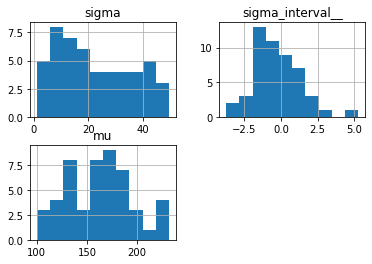

In [9]:
priorDF.hist()

<AxesSubplot:>

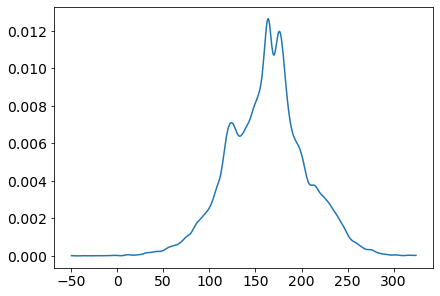

In [10]:
import arviz as az
az.plot_kde((prior_checks['height']))

SAME THING WITH ARVIZ

In [11]:

names = d2.index.values
N = len(names)


dims={
    "height": ["developer"],
    "weight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as model:
    
    
    mu = pm.Normal('mu', mu=167, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    
    # BUİLDS PRIOR PREDICTİVE DIST
    
    trace = pm.sample(400, chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive(trace)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )

Only 400 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [sigma, mu]
100%|██████████| 1600/1600 [00:06<00:00, 259.65it/s]


0, dim: developer, 352 =? 352


<AxesSubplot:xlabel='height'>

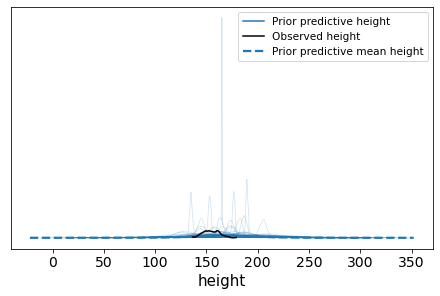

In [12]:
   az.plot_ppc(idata_pymc3 ,group='prior') # plot prior predictive dist

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

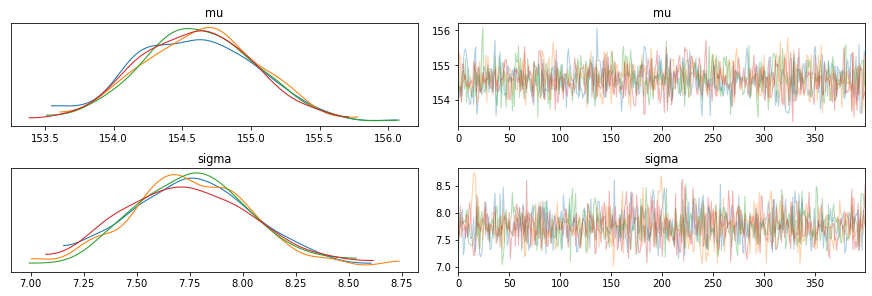

In [14]:
az.plot_trace(trace) 

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

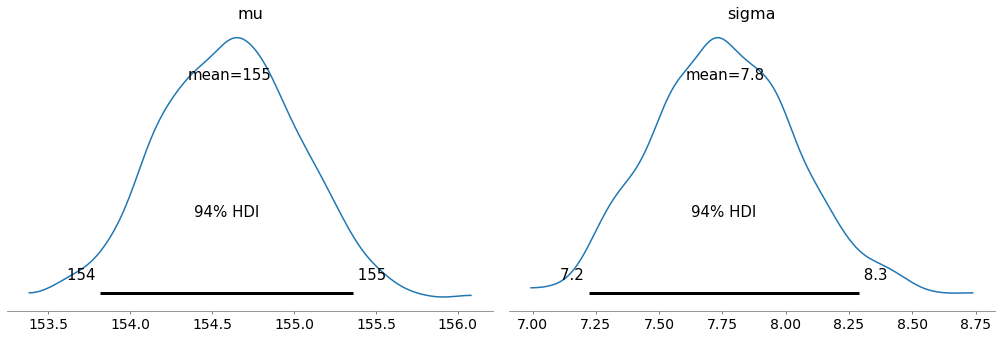

In [15]:
az.plot_posterior(trace) # plot posterior distributıon after seing data

<AxesSubplot:xlabel='height'>

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


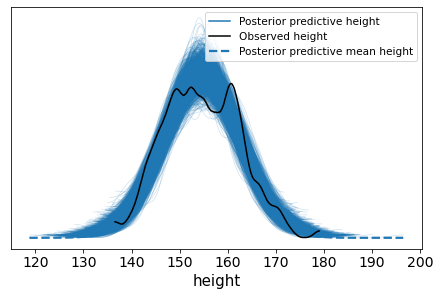

In [16]:
 az.plot_ppc(idata_pymc3 ,group='posterior')#posterior predictive dist

<b>Linear Regression</b>


What we’ve done above is a Gaussian model of height in a population of adults. But it
doesn’t really have the usual feel of “regression” to it. Typically, we are interested in modeling
how an outcome is related to some other variable, a predictor variable. If the predictor
variable has any statistical association with the outcome variable, then we can use it to predict
the outcome. When the predictor variable is built inside the model in a particular way, we’ll
have linear regression.
So now let’s look at how height in these Kalahari foragers (the outcome variable) covaries
with weight (the predictor variable).

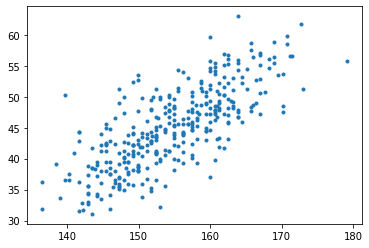

In [5]:
plt.plot(d2.height, d2.weight, ".");

hi ∼ Normal(μi, σ) [likelihood]

μi = α + β(xi − ¯x) [linear model]

α ∼ Normal(178, 20) [α prior]

β ∼ Normal(0, 10) [β prior]

σ ∼ Uniform(0, 50) [σ prior]

In [7]:
xbar=d2.weight.mean()
names = d2.index.values
N = len(names)


In [10]:



dims={
    "height": ["developer"],
    "weight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as m4_3:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Normal("b", mu=0, sd=10)
    sigma = pm.Uniform("sigma", 0, 50)
    mu = a + b * (d2.weight - xbar)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    #trace_4_3 = pm.sample(1000, tune=1000)
    trace_4_3 = pm.sample(1000, tune=1000 ,chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive(trace_4_3)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace_4_3,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [sigma, b, a]
100%|██████████| 4000/4000 [00:24<00:00, 164.54it/s]


NameError: name 'az' is not defined

<b>Prior Check</b>


In [19]:
(d2.weight - xbar).min()

-13.919433519886361

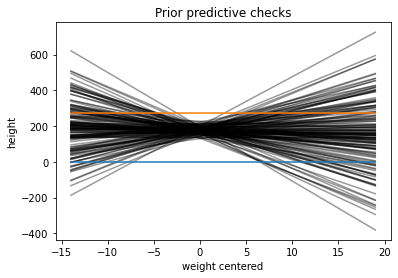

In [20]:
_, ax = plt.subplots()

x = np.linspace(-14, 19, 50)

for a, b in zip(prior["a"], prior["b"]):
    y = a + b * x
    ax.plot(x, y, c="k", alpha=0.4)
ax.plot(x,np.zeros(50))
ax.plot(x,np.ones(50)*272)# the maximum recorded height
ax.set_xlabel("weight centered")
ax.set_ylabel("height")
ax.set_title("Prior predictive checks");

We can do better immediately. We know that average height increases with average
weight, at least up to a point. Let’s try restricting it to positive values. The easiest way to do
this is to define the prior as Log-Normal instead.

In [13]:
import arviz as az
dims={
    "height": ["developer"],
    "weight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as logm4_3:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Lognormal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    #mu = a + b * (d2.weight - xbar)
    mu = pm.Deterministic("mu", a + b * (d2.weight - d2.weight.mean()))
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    #trace_4_3 = pm.sample(1000, tune=1000)
    tracelog_4_3 = pm.sample(1000, tune=1000 ,chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive( tracelog_4_3)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        tracelog_4_3,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [sigma, b, a]
100%|██████████| 4000/4000 [00:36<00:00, 111.08it/s]


0, dim: developer, 352 =? 352


In [134]:
 tracelog_4_3

<MultiTrace: 4 chains, 1000 iterations, 6 variables>

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>]], dtype=object)

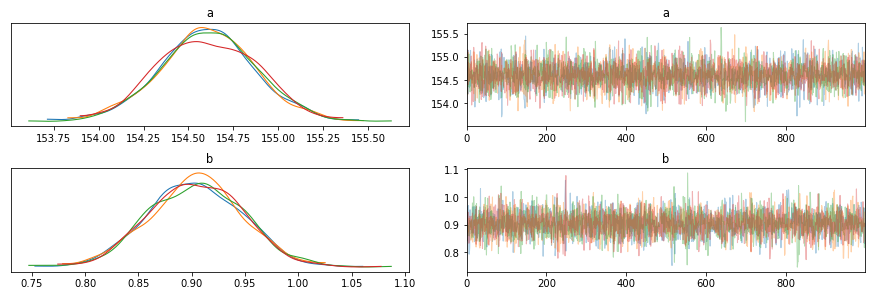

In [135]:
az.plot_trace(tracelog_4_3, var_names=['a', 'b'])

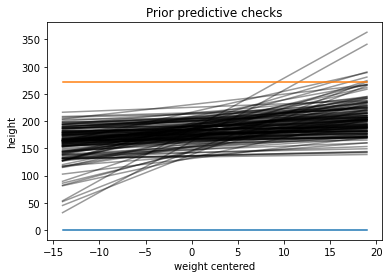

In [14]:
_, ax = plt.subplots()

x = np.linspace(-14, 19, 50)

for a, b in zip(prior["a"], prior["b"]):
    y = a + b * x
    ax.plot(x, y, c="k", alpha=0.4)
ax.plot(x,np.zeros(50))
ax.plot(x,np.ones(50)*272)
ax.set_xlabel("weight centered")
ax.set_ylabel("height")
ax.set_title("Prior predictive checks");

In [15]:
az.summary(tracelog_4_3, kind="stats")

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
a,154.598,0.275,154.115,155.131
b,0.904,0.043,0.821,0.983
sigma,5.104,0.195,4.753,5.462
mu[0],157.161,0.303,156.626,157.752
mu[1],146.910,0.457,146.027,147.744
...,...,...,...,...
mu[347],156.443,0.290,155.900,156.970
mu[348],144.886,0.538,143.856,145.870
mu[349],161.082,0.419,160.329,161.899
mu[350],162.799,0.484,161.939,163.742


In [75]:
tracelog_4_3["mu"].shape

(4000, 352)

In [16]:
trace_4_3_df = pm.trace_to_dataframe(tracelog_4_3)
trace_4_3_df.cov().round(3)

,a,b,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__342,mu__343,mu__344,mu__345,mu__346,mu__347,mu__348,mu__349,mu__350,mu__351
a,0.076,0.000,0.000,0.076,0.074,0.073,0.077,0.075,0.079,0.074,...,0.075,0.076,0.075,0.075,0.075,0.076,0.074,0.077,0.077,0.077
b,0.000,0.002,-0.000,0.006,-0.016,-0.025,0.015,-0.007,0.034,-0.013,...,-0.002,0.006,-0.010,-0.007,-0.008,0.004,-0.020,0.014,0.017,0.014
sigma,0.000,-0.000,0.038,-0.000,0.001,0.002,-0.001,0.001,-0.002,0.001,...,0.000,-0.000,0.001,0.001,0.001,0.000,0.001,-0.001,-0.001,-0.001
mu__0,0.076,0.006,-0.000,0.092,0.029,0.003,0.121,0.056,0.176,0.039,...,0.071,0.092,0.045,0.054,0.053,0.087,0.017,0.116,0.126,0.118
mu__1,0.074,-0.016,0.001,0.029,0.209,0.282,-0.054,0.133,-0.212,0.181,...,0.089,0.028,0.163,0.137,0.140,0.042,0.245,-0.040,-0.070,-0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mu__347,0.076,0.004,0.000,0.087,0.042,0.023,0.109,0.061,0.149,0.049,...,0.072,0.088,0.053,0.060,0.059,0.084,0.033,0.105,0.113,0.106
mu__348,0.074,-0.020,0.001,0.017,0.245,0.338,-0.088,0.148,-0.289,0.209,...,0.093,0.015,0.186,0.153,0.157,0.033,0.290,-0.071,-0.109,-0.078
mu__349,0.077,0.014,-0.001,0.116,-0.040,-0.103,0.188,0.026,0.324,-0.016,...,0.064,0.117,0.000,0.023,0.020,0.105,-0.071,0.175,0.202,0.181
mu__350,0.077,0.017,-0.001,0.126,-0.070,-0.150,0.217,0.013,0.389,-0.040,...,0.061,0.127,-0.020,0.009,0.005,0.113,-0.109,0.202,0.234,0.208



In choosing priors, there are simple guidelines to get you started. Priors encode states of information
before seeing data. So priors allow us to explore the consequences of beginning with different
information. In cases in which we have good prior information that discounts the plausibility of some
parameter values, like negative associations between height and weight, we can encode that information
directly into priors. When we don’t have such information, we still usually know enough about
the plausible range of values. And you can vary the priors and repeat the analysis in order to study
how different states of initial information influence inference. Frequently, there are many reasonable
choices for a prior, and all of them produce the same inference.



https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations

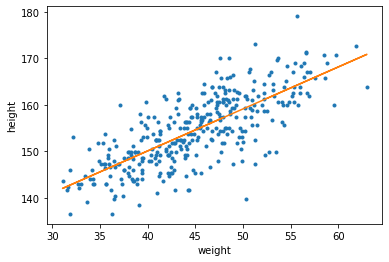

In [17]:
plt.plot(d2.weight, d2.height, ".")
plt.plot(d2.weight, tracelog_4_3["a"].mean() + tracelog_4_3["b"].mean() * (d2.weight - xbar))
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


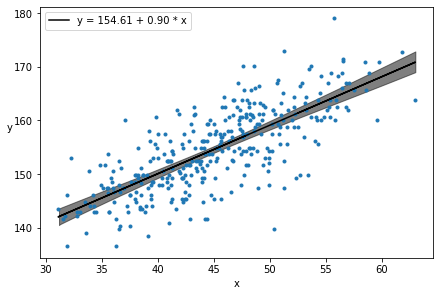

In [140]:
x=d2.weight
y=d2.height
alpha_m=tracelog_4_3["a"].mean()
beta_m=tracelog_4_3["b"].mean()

az.plot_hdi(x, tracelog_4_3['mu'], credible_interval=0.98, color='k')

plt.plot(x, y, 'C0.')
plt.plot(x, alpha_m + beta_m * (x-xbar), c='k',label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()


Notice that uncertainty is lower in the middle, although it is not reduced to a single point,
that is, the posterior is compatible with lines not passing exactly through the mean of the
data. This is the uncertainity in <b>mu</b>:Conditional on the assumption that
height and weight are related by a straight line, then this is the most plausible line, and these are its
plausible bounds.


<b>Prediction intervals.</b>


Now let’s walk through generating an 89% prediction interval
for actual heights, not just the average height, μ. This means we’ll incorporate the
standard deviation σ and its uncertainty as well. Remember, the first line of the statistical
model here is:

hi ∼ Normal(μi, σ)

What you’ve done so far is just use samples from the posterior to visualize the uncertainty
in μi, the linear model of the mean. But actual predictions of heights depend also upon the
distribution in the first line. The Gaussian distribution on the first line tells us that the model
expects observed heights to be distributed around μ, not right on top of it. And the spread
around μ is governed by σ. All of this suggests we need to incorporate σ in the predictions
somehow.

Here’s how you do it. Imagine simulating heights. For any unique weight value, you sample
from a Gaussian distribution with the correct mean μ for that weight, using the correct
value of σ sampled from the same posterior distribution. If you do this for every sample
from the posterior, for every weight value of interest, you end up with a collection of simulated
heights that embody the uncertainty in the posterior as well as the uncertainty in the
Gaussian distribution

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


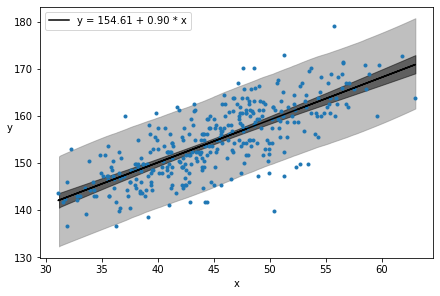

In [141]:
ax=az.plot_hdi(x, posterior_predictive['height'], color='gray')
az.plot_hdi(x, tracelog_4_3['mu'], credible_interval=0.98, color='k',ax=ax)

plt.plot(x, y, 'C0.')
plt.plot(x, alpha_m + beta_m * (x-xbar), c='k',label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()